# Example - Goodness-of-fit when $\alpha$ is known

In this sample case, we simulate data from a GSMP-VGLM Distribution where $\alpha$ is known.  We then estimate $\hat{\boldsymbol{\eta}}$ and $\hat{\boldsymbol{\beta}}$ and generate the QQ-Plots for $X$ and $Y$ as well as Kolmogorov-Smirnov p-values.

In [1]:
# Import needed libraries
from gsmp_vglm.data_generation import GSMP_GLMData
from gsmp_vglm.grad_desc_sem_functions import GSMP_GLM
from gsmp_vglm.goodness_of_fit import GSMPGoodnessOfFit
import numpy as np
import scipy
from scipy.stats import gamma
import pandas as pd

In [2]:
# Set parameters for the data generation process
n_obs = 500
n_cov = 2
eta_vec = np.array([1.0, 0.5, -0.25])
beta_vec = np.array([2.0, -2.0, 1.0])
alpha = 0.1

print("Generating data...")
# Generate synthetic data
data_gen = GSMP_GLMData(
    dist_type = 'uniform',
    alpha = alpha,
    n_obs=n_obs, 
    n_cov=n_cov, 
    add_intercept=True, 
    eta_vec=eta_vec, 
    beta_vec=beta_vec
)

# Resulting outputs
X, Y, N, W, Z = data_gen.make_data()

Generating data...


In [3]:
# Instantiate and fit the model
gsmp_glm = GSMP_GLM()
eta_est, beta_est, _, _ = gsmp_glm.fit(X, N, W, 
                                       Z, alpha, learning_rate = 0.001, 
                                       num_iterations = 100, init_multiplier = 0.99999999999)

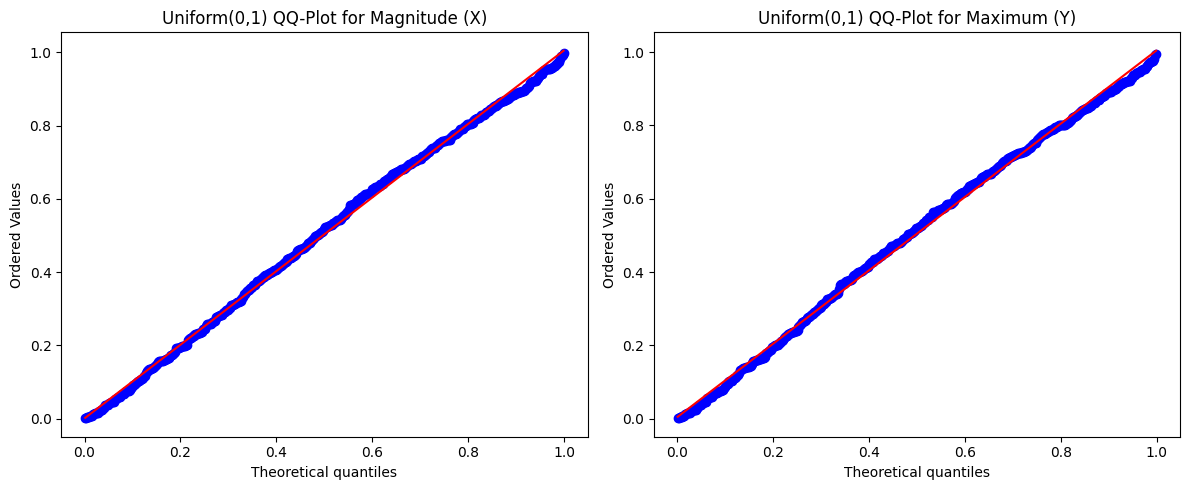

In [4]:
gof = GSMPGoodnessOfFit(eta_est, beta_est, X, Y, W, Z, alpha)
results = gof.run_analysis()

In [5]:
print(f'Kolmogorov-Smirnov Test p-values for uniformity for X: {results['x_ks_test']['p_value']}\nKolmogorov-Smirnov Test p-values for uniformity for Y: {results['y_ks_test']['p_value']}')

Kolmogorov-Smirnov Test p-values for uniformity for X: 0.74174176218623
Kolmogorov-Smirnov Test p-values for uniformity for Y: 0.7158455551802045
